# **🍇Project 3: Wild Blueberry Yield Prediction**

🧾**Description:** The dataset used for predictive modelling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program, that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches. This simulated data provides researchers who have actual data collected from field observation and those who wants to experiment the potential of machine learning algorithms response to real data and computer simulation modelling generated data as input for crop yield prediction models.

\-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

🧭 **Problem Statement:** The target feature is **yield** which is a continuous variable. The task is to classify this variable based on the other 17 features step-by-step by going through each day's task. The evaluation metrics will be RMSE score


# Tried Sweetviz for visualization (attached the viz output analyze.html file) and Lazypredict regressor

# Import Libraries

In [1]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


### Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor
### Importing dataset available in sklearn
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

import joblib
%matplotlib inline

# Import Data And Preprocessing

According to data dictionary, we have 3 unknown fields, fruitset, fruitmass, seeds having high correlation values with the target varialble, the yield value.

we have a data dictionary of mutual correlated values of each of the fields with yield values
as this clearly is a regression problem, we can perform feature selection on the data
there are the following approaches:
f_regression() parameter for selecting by correlation
mutual_info_regression() for selecting by information gain
raw data features kept intact

In [2]:
berry_data = pd.read_csv('WildBlueberryPollinationSimulationData.csv')
berry_data.head(20) # 999,-999

Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0      0      37.50      0.75     0.25     0.25   0.25             86.00   
1      1      37.50      0.75     0.25     0.25   0.25             86.00   
2      2      37.50      0.75     0.25     0.25   0.25             94.60   
3      3      37.50      0.75     0.25     0.25   0.25             94.60   
4      4      37.50      0.75     0.25     0.25   0.25             86.00   
5      5      37.50      0.75     0.25     0.25   0.25             86.00   
6      6      37.50      0.75     0.25     0.25   0.25             94.60   
7      7      37.50      0.75     0.25     0.25   0.25             94.60   
8      8      37.50      0.75     0.25     0.25   0.25             77.40   
9      9      37.50      0.75     0.25     0.25   0.25             77.40   
10    10      37.50      0.75     0.25     0.25   0.25             69.70   
11    11      37.50      0.25     0.25     0.25   0.25             86.00   
12    12      37.50      0.25     0.25     0.25   0.25             86.00   
13    13      37.50      0.25     0.25     0.25   0.25             94.60   
14    14      37.50      0.25     0.25     0.25   0.25             94.60   
15    15      37.50      0.25     0.25     0.25   0.25             86.00   
16    16      37.50      0.25     0.25     0.25   0.25             86.00   
17    17      37.50      0.25     0.25     0.25   0.25             94.60   
18    18      37.50      0.25     0.25     0.25   0.25             94.60   
19    19      37.50      0.25     0.25     0.25   0.25             77.40   

    MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
0              52.00                 71.90             62.00   
1              52.00                 71.90             62.00   
2              57.20                 79.00             68.20   
3              57.20                 79.00             68.20   
4              52.00                 71.90             62.00   
5              52.00                 71.90             62.00   
6              57.20                 79.00             68.20   
7              57.20                 79.00             68.20   
8              46.80                 64.70             55.80   
9              46.80                 64.70             55.80   
10             42.10                 58.20             50.20   
11             52.00                 71.90             62.00   
12             52.00                 71.90             62.00   
13             57.20                 79.00             68.20   
14             57.20                 79.00             68.20   
15             52.00                 71.90             62.00   
16             52.00                 71.90             62.00   
17             57.20                 79.00             68.20   
18             57.20                 79.00             68.20   
19             46.80                 64.70             55.80   

    MinOfLowerTRange  AverageOfLowerTRange  RainingDays  AverageRainingDays  \
0              30.00                 50.80        16.00                0.26   
1              30.00                 50.80         1.00                0.10   
2              33.00                 55.90        16.00                0.26   
3              33.00                 55.90         1.00                0.10   
4              30.00                 50.80        24.00                0.39   
5              30.00                 50.80        34.00                0.56   
6              33.00                 55.90        24.00                0.39   
7              33.00                 55.90        34.00                0.56   
8              27.00                 45.80        16.00                0.26   
9              27.00                 45.80         1.00                0.10   
10             24.30                 41.20        16.00                0.26   
11             30.00                 50.80        16.00                0.26   
12             30.00               

In [3]:
berry_data.shape

(777, 18)

In [4]:
berry_data.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [5]:
berry_data.describe()

Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
count 777.00     777.00    777.00   777.00   777.00 777.00            777.00   
mean  388.00      18.77      0.42     0.28     0.47   0.56             82.28   
std   224.44       7.00      0.98     0.07     0.16   0.17              9.19   
min     0.00      10.00      0.00     0.00     0.00   0.00             69.70   
25%   194.00      12.50      0.25     0.25     0.38   0.50             77.40   
50%   388.00      12.50      0.25     0.25     0.50   0.63             86.00   
75%   582.00      25.00      0.50     0.38     0.63   0.75             89.00   
max   776.00      40.00     18.43     0.58     0.75   0.75             94.60   

       MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
count            777.00                777.00            777.00   
mean              49.70                 68.72             59.31   
std                5.60                  7.68              6.65   
min               39.00                 58.20             50.20   
25%               46.80                 64.70             55.80   
50%               52.00                 71.90             62.00   
75%               52.00                 71.90             66.00   
max               57.20                 79.00             68.20   

       MinOfLowerTRange  AverageOfLowerTRange  RainingDays  \
count            777.00                777.00       777.00   
mean              28.69                 48.61        18.31   
std                3.21                  5.42        12.12   
min               24.30                 41.20         1.00   
25%               27.00                 45.80         3.77   
50%               30.00                 50.80        16.00   
75%               30.00                 50.80        24.00   
max               33.00                 55.90        34.00   

       AverageRainingDays  fruitset  fruitmass  seeds   yield  
count              777.00    777.00     777.00 777.00  777.00  
mean                 0.32      0.50       0.45  36.12 6012.85  
std                  0.17      0.08       0.04   4.38 1356.96  
min                  0.06      0.19       0.31  22.08 1637.70  
25%                  0.10      0.45       0.42  33.12 5124.85  
50%                  0.26      0.51       0.45  36.17 6107.38  
75%                  0.39      0.56       0.48  39.24 7022.19  
max                  0.56      0.65       0.54  46.59 8969.40

In [6]:
# are there any constants -- min, max, avg would be same
# are there any pseudo null (0, 999, -999, 800)-- which is not present in the entire dataset, but seems like outliers. 
# in most cases they are preprocessed, null replaced by such value
# skewness -- by looking at 1st n 3rd quantile, min,max values
# null

In [7]:
berry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [8]:
berry_data.nunique()
# normal temp range 12-25 ()
# 5 (1,2,3,4,5) - acts as categorical value
#fruitset                777  yield can be directly related to these columns bcoz every value is unique in these columns
#fruitmass               777
#seeds                   777
#yield                   777

Row#                    777
clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

# Data Visualization

## Tried using Sweetviz for visulaization 

In [9]:
import sweetviz as sv
analyze_report = sv.analyze(berry_data)
analyze_report.show_html('analyze.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


analyze.html has been opened in another tab, where we can see the detailed EDA by Sweetviz, on clicking associations button we
can see the heatmap


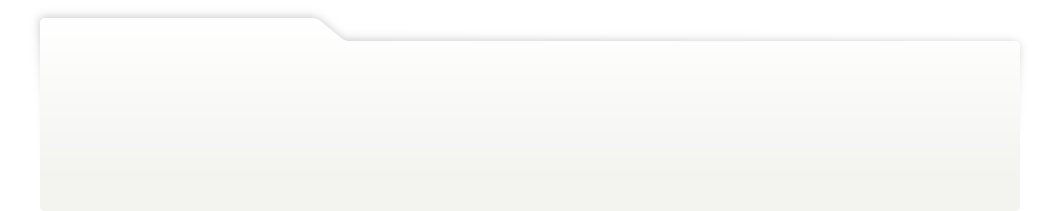
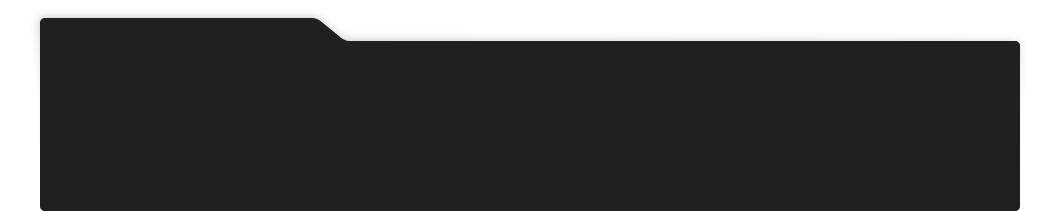
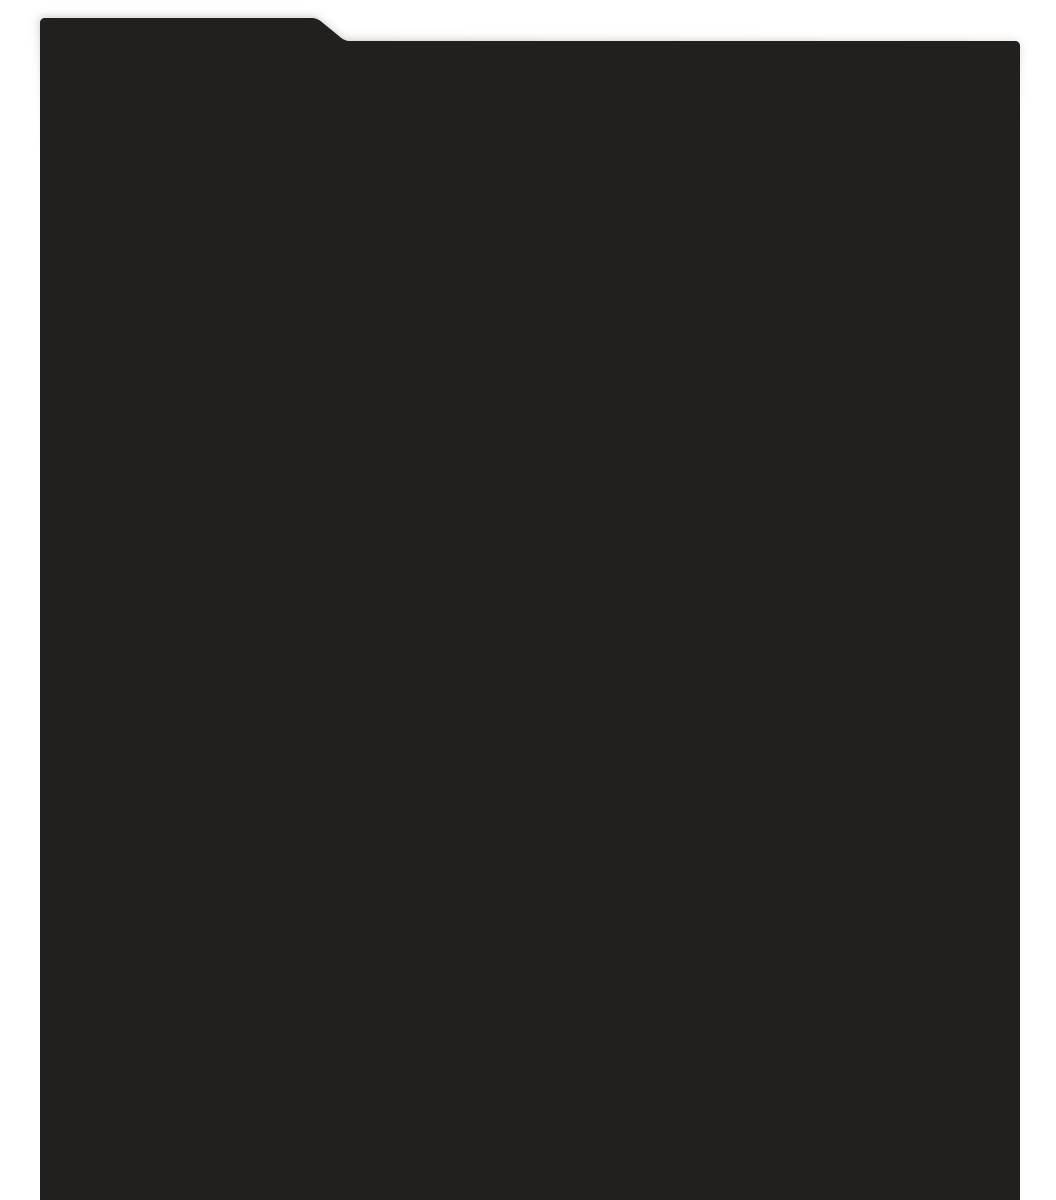
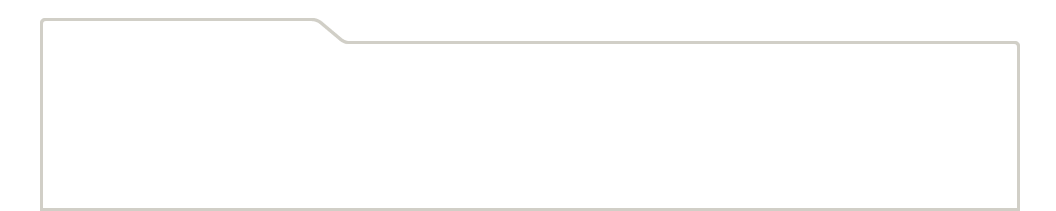
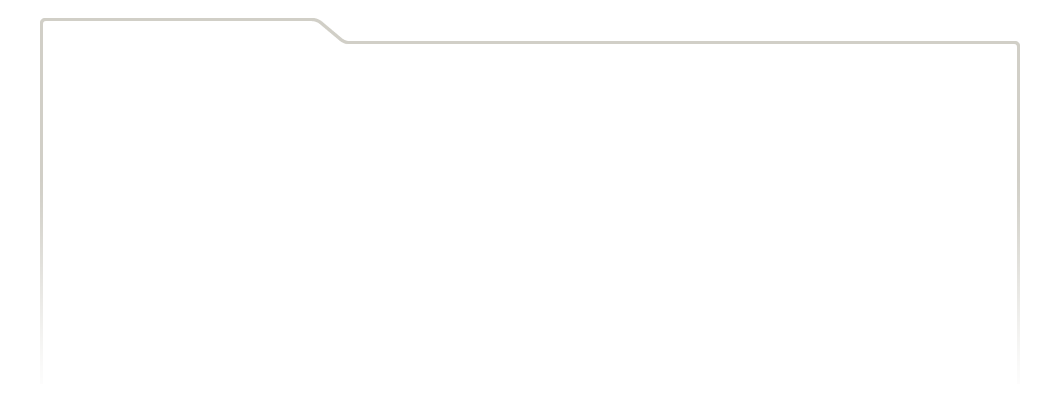
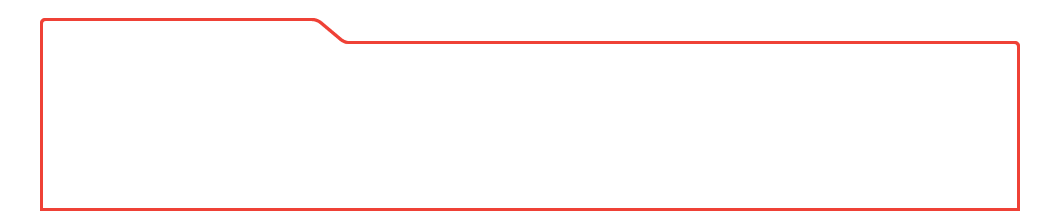
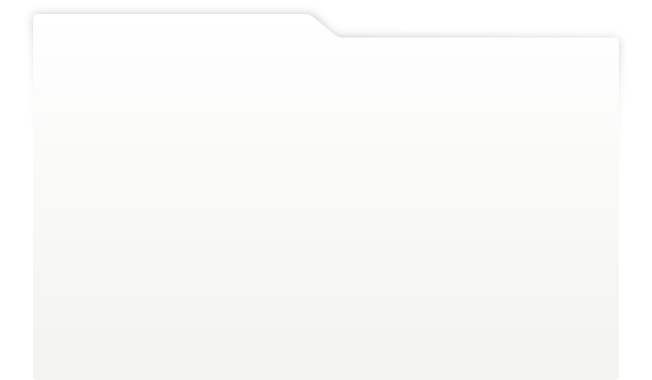
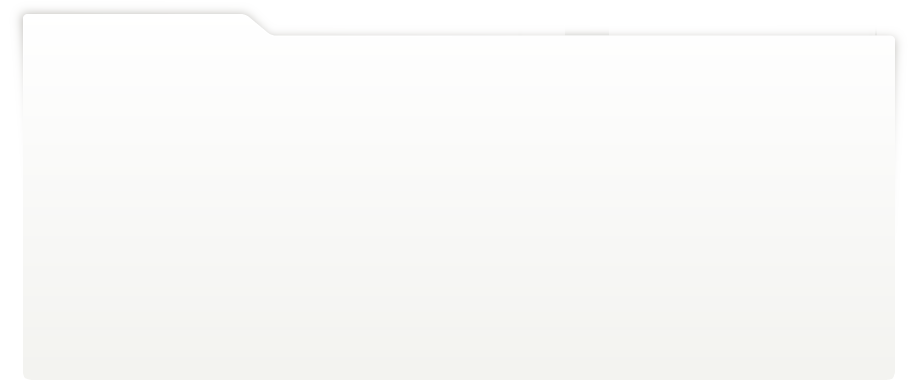
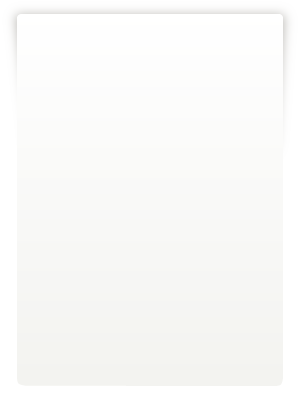
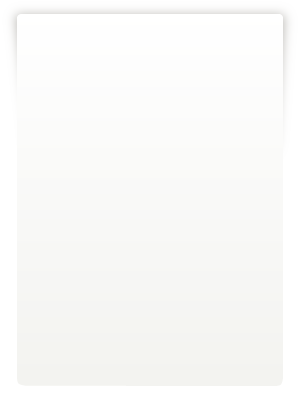
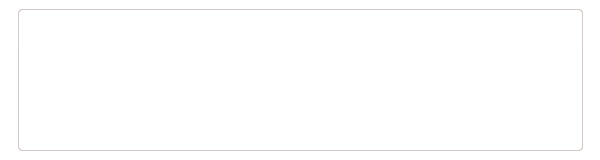
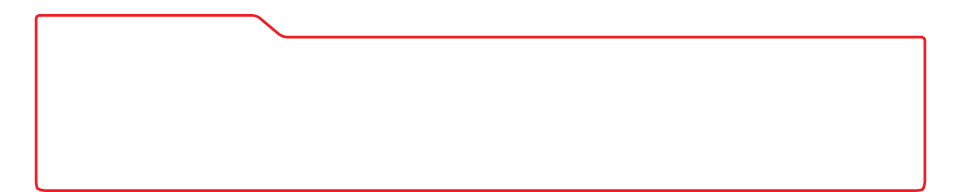
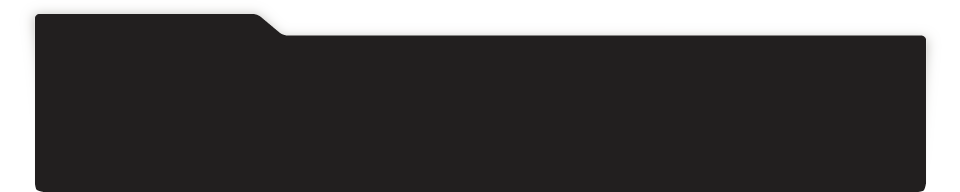
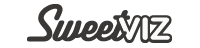
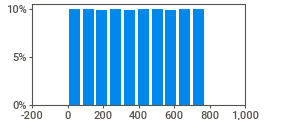
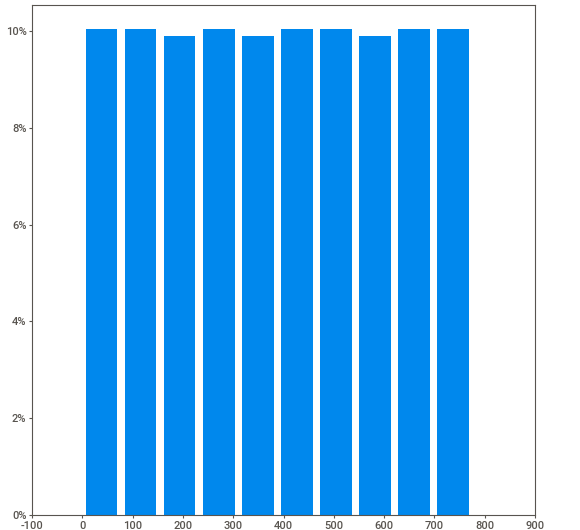
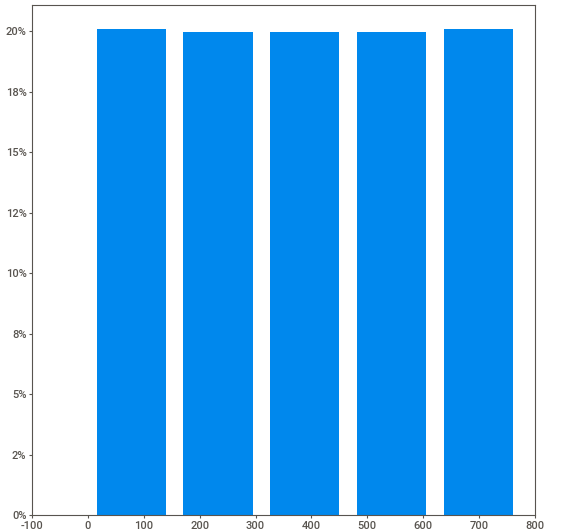
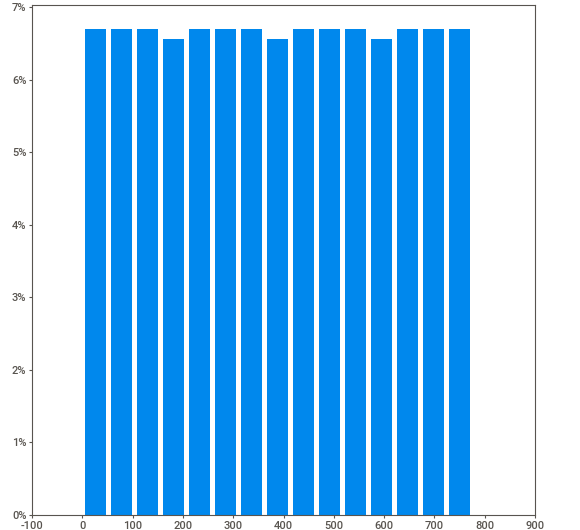
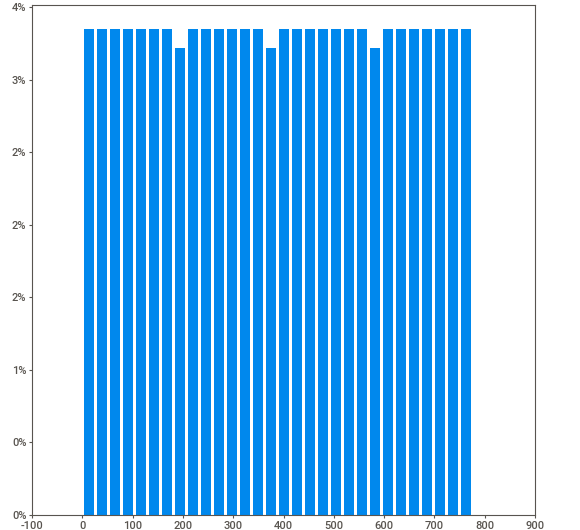
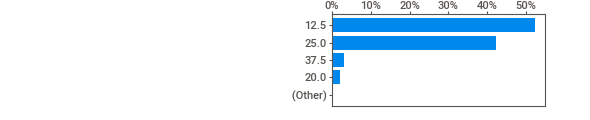
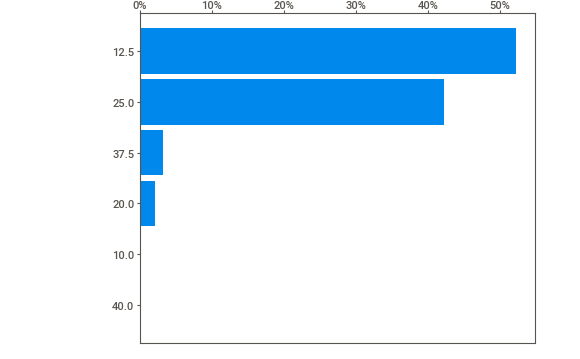
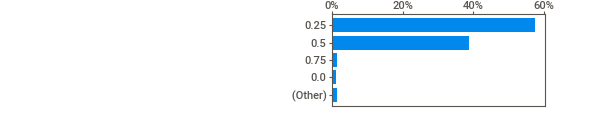
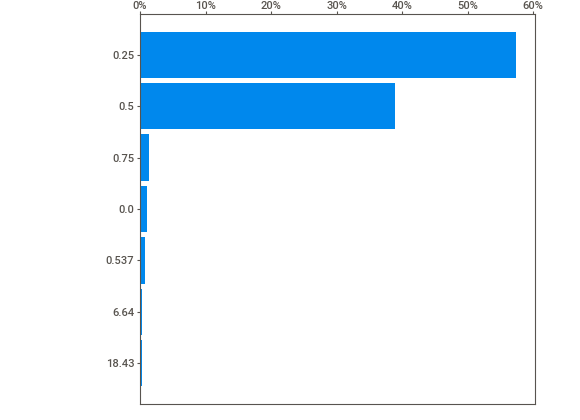
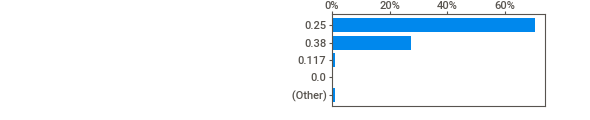
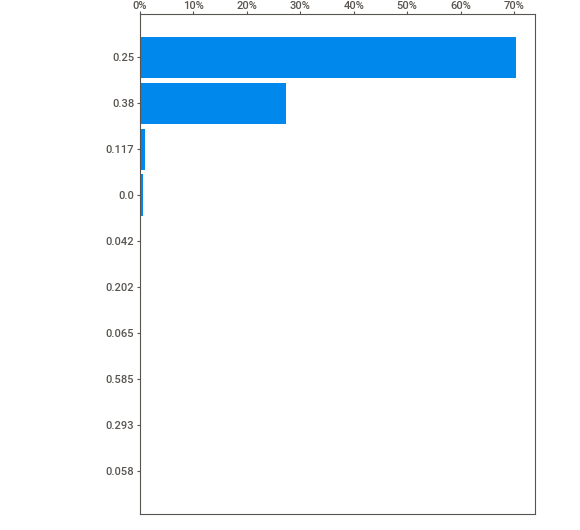
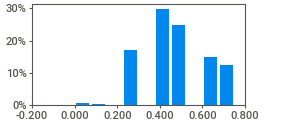
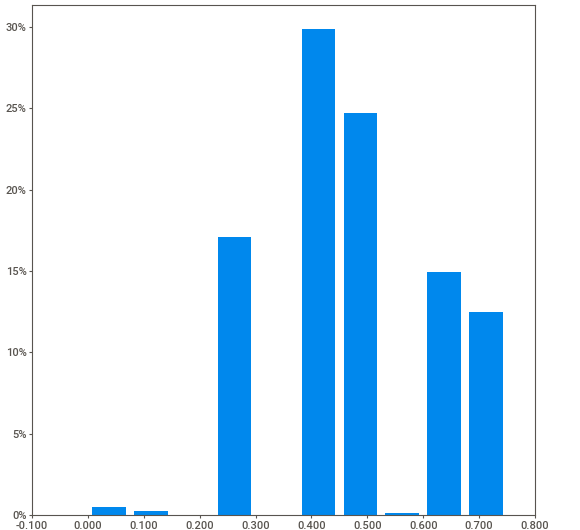
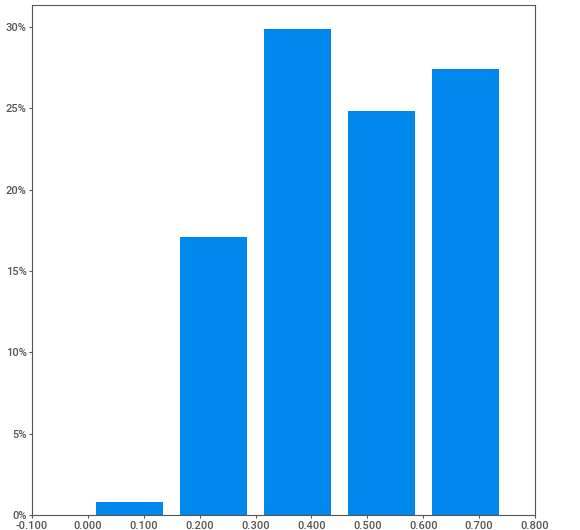
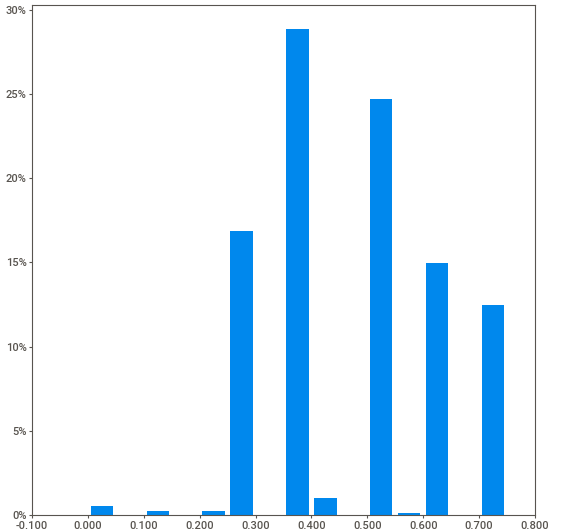
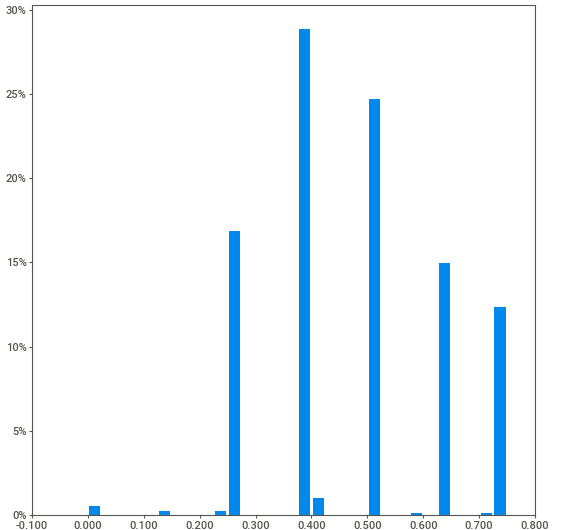
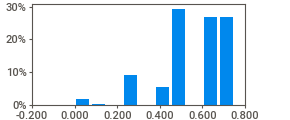
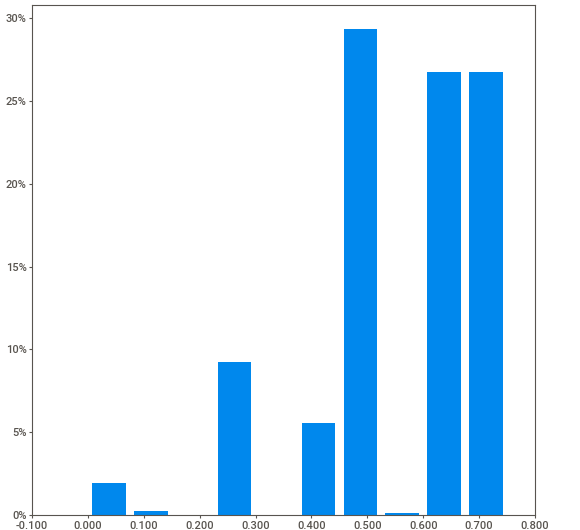
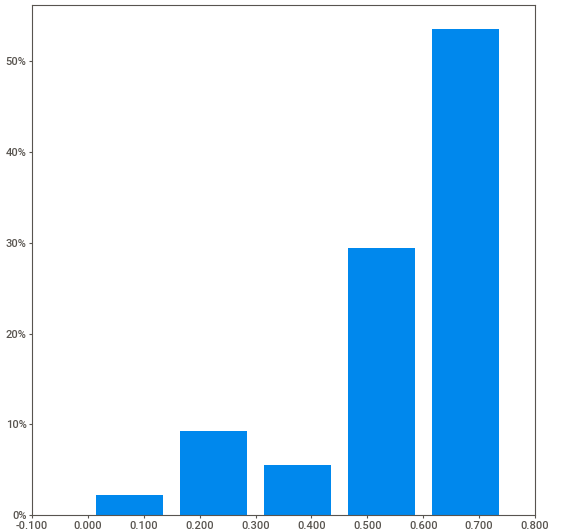
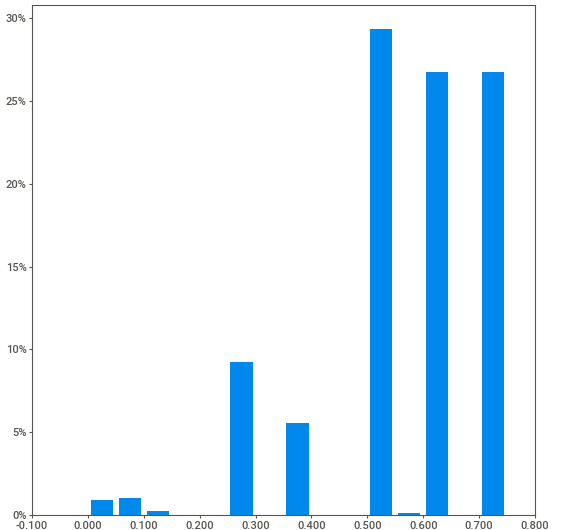
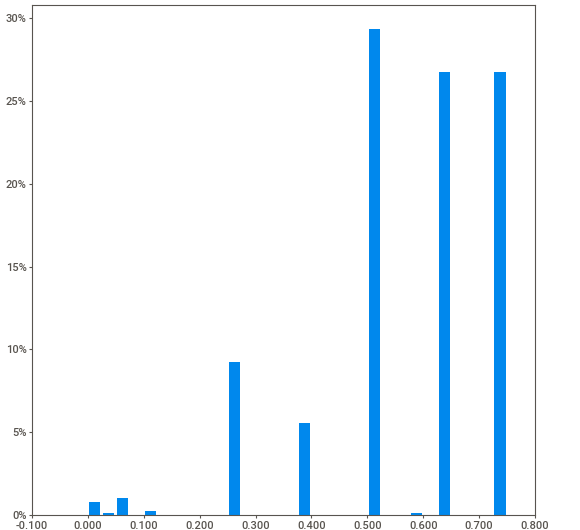
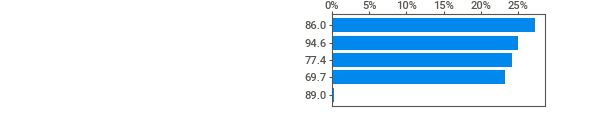
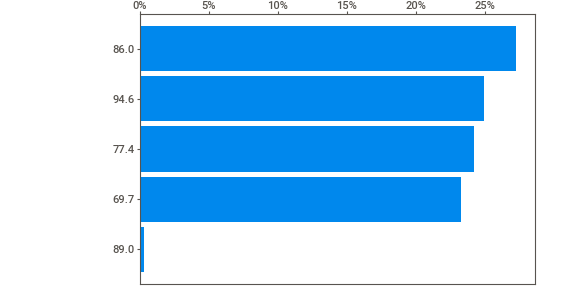
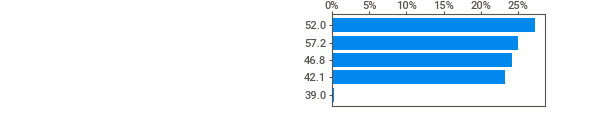
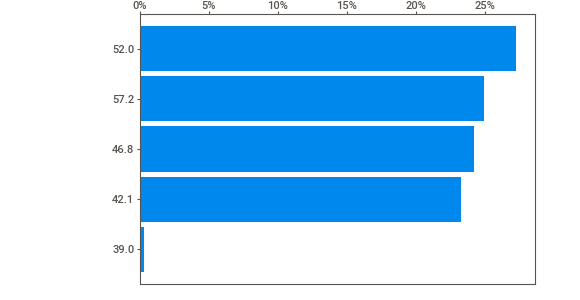
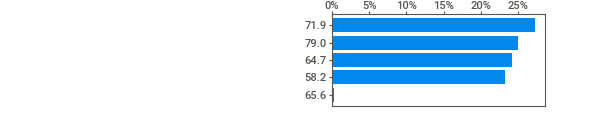
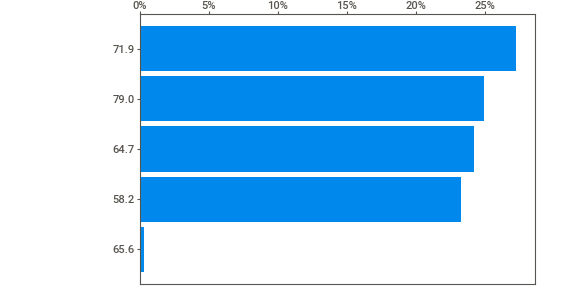
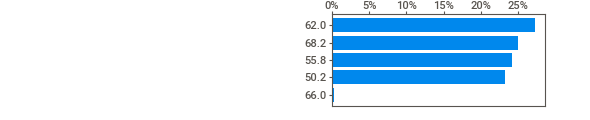
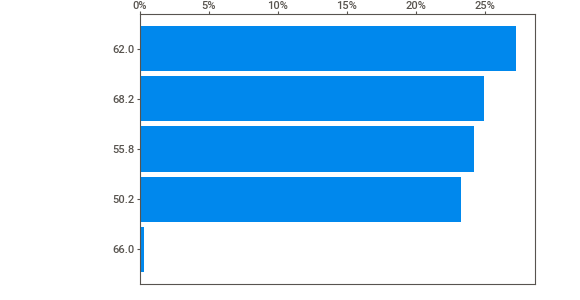
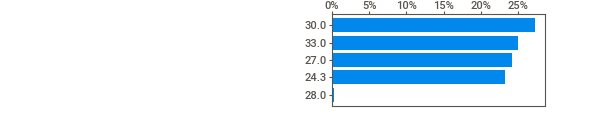
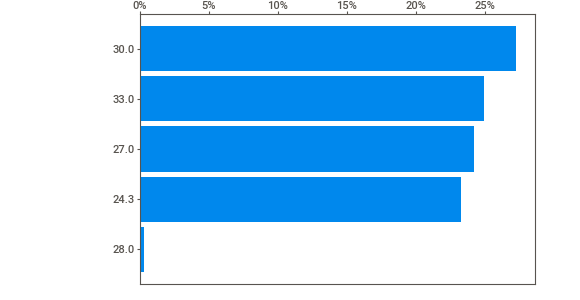
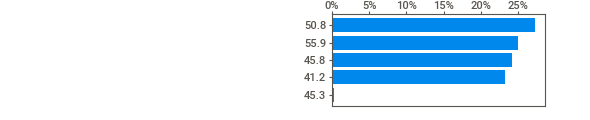
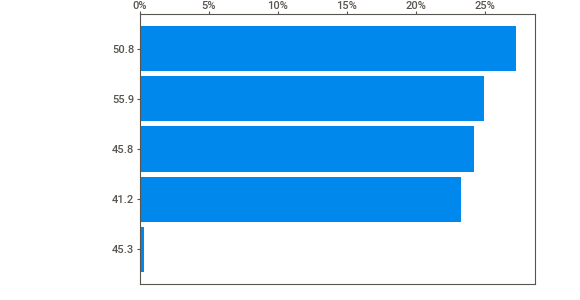
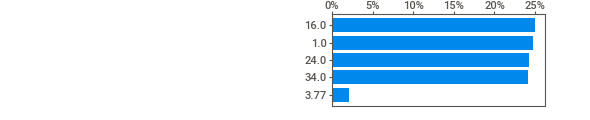
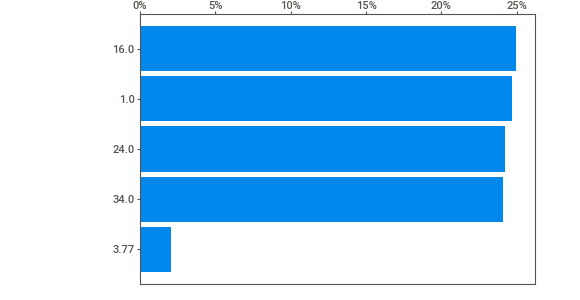
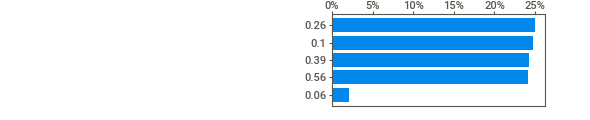
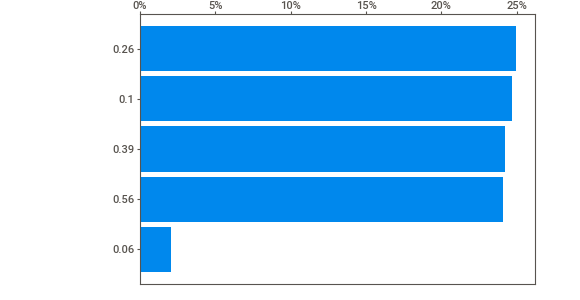
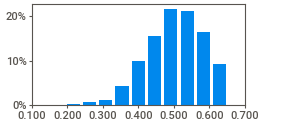
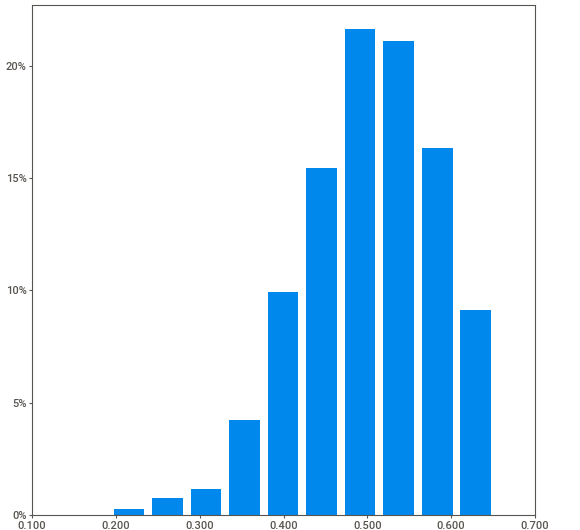
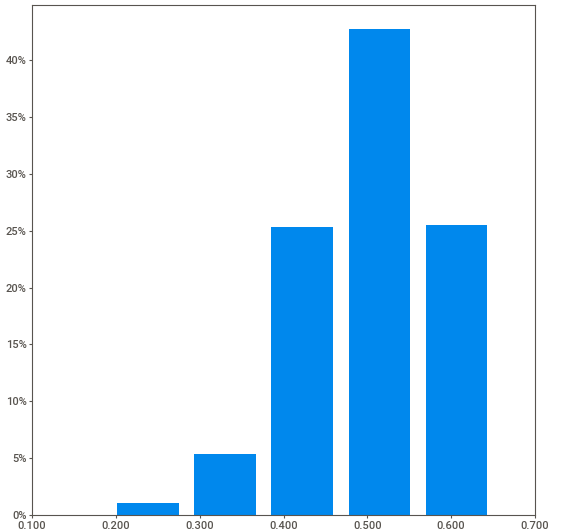
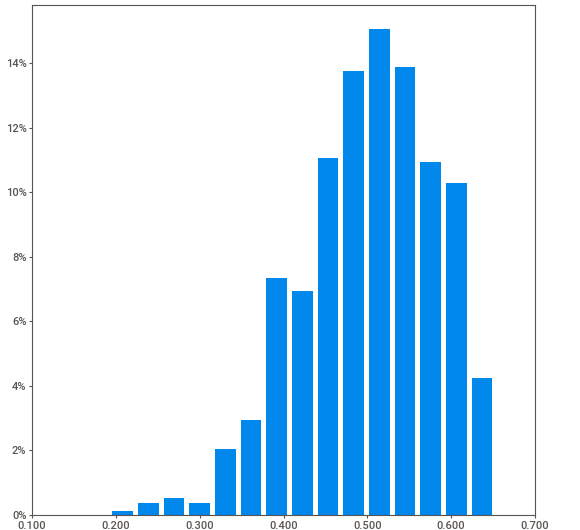
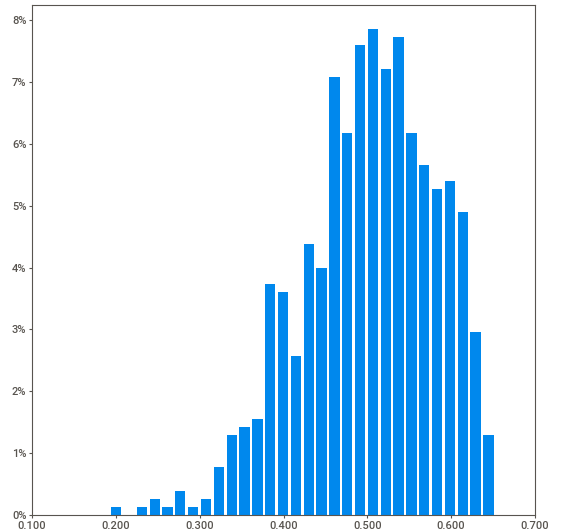
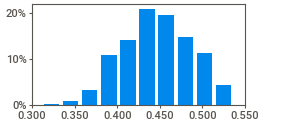
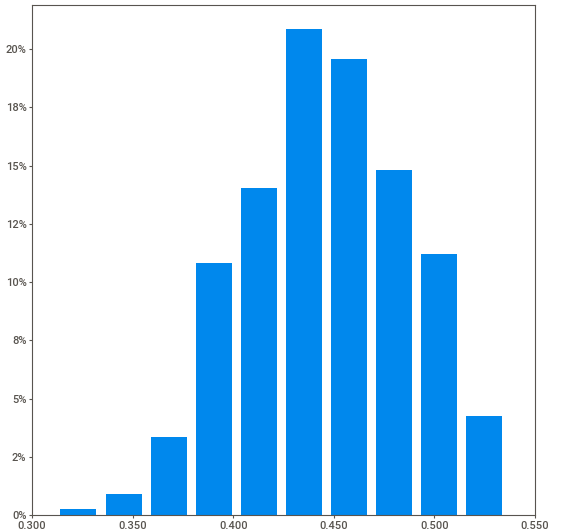
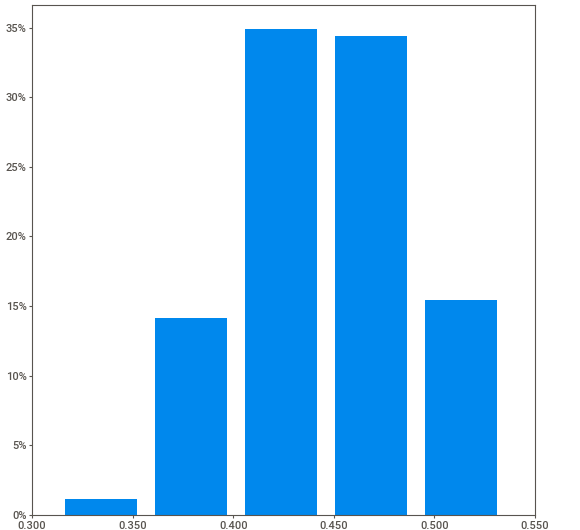
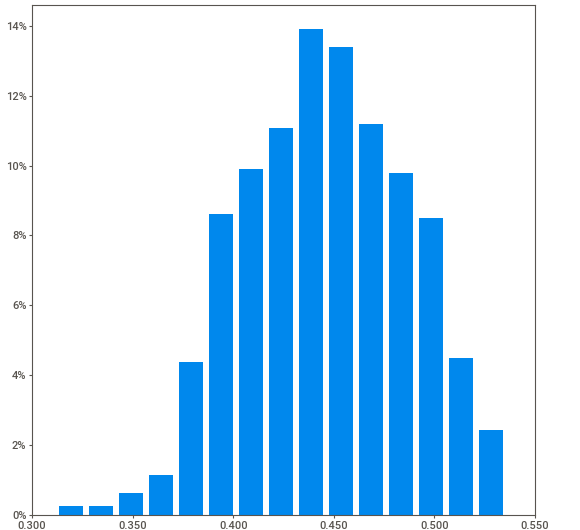
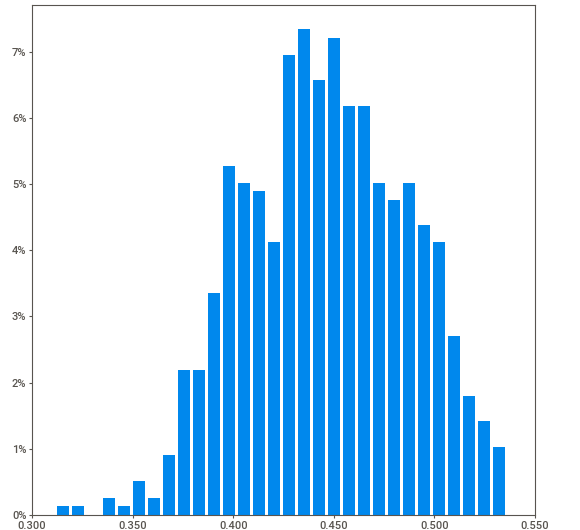
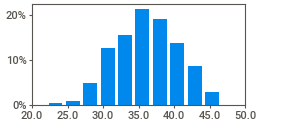
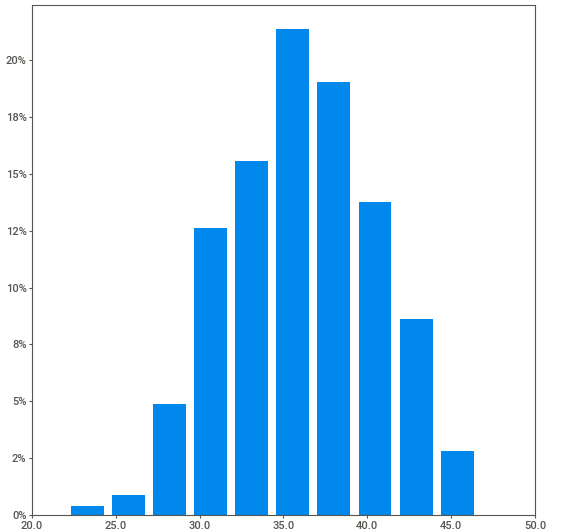
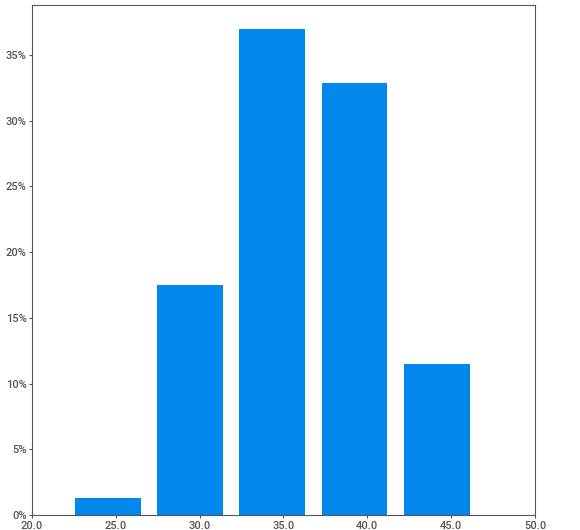
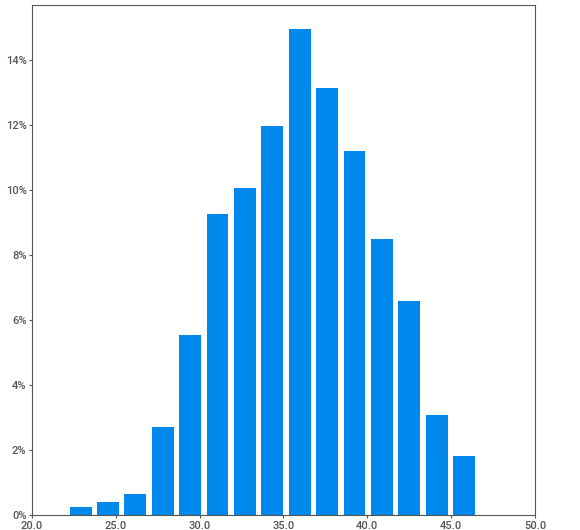
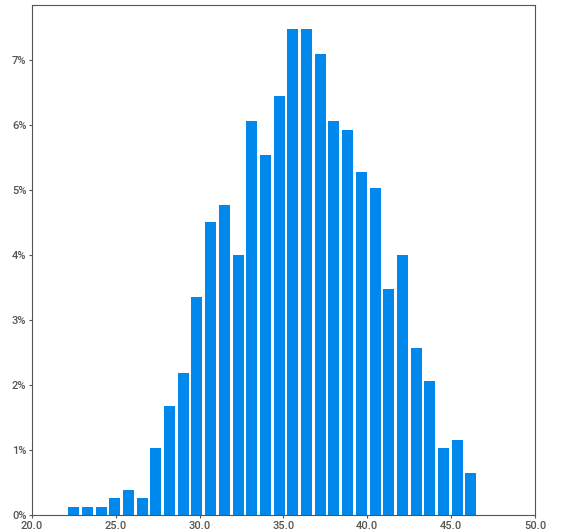
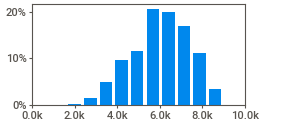
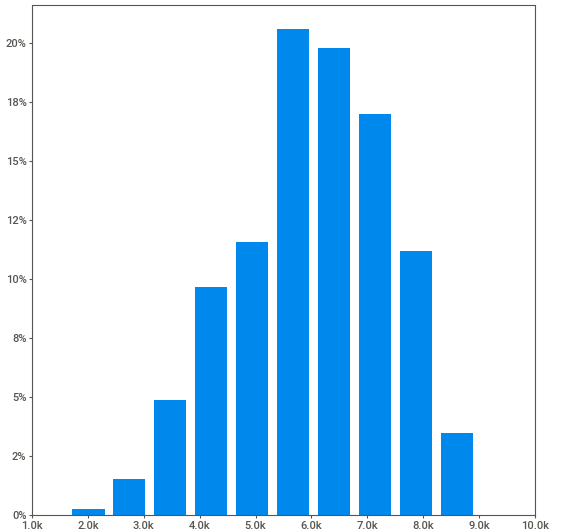
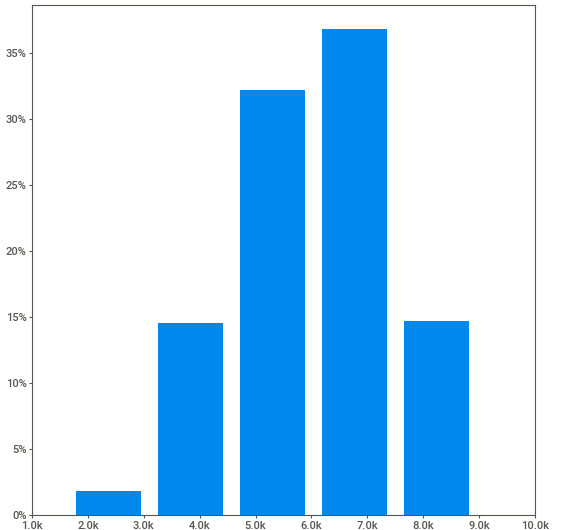
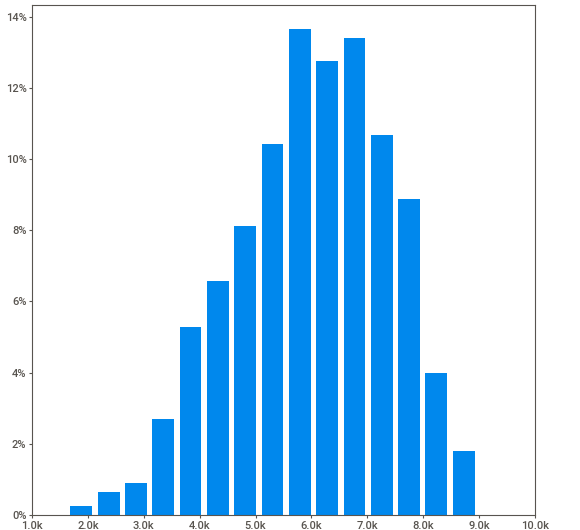
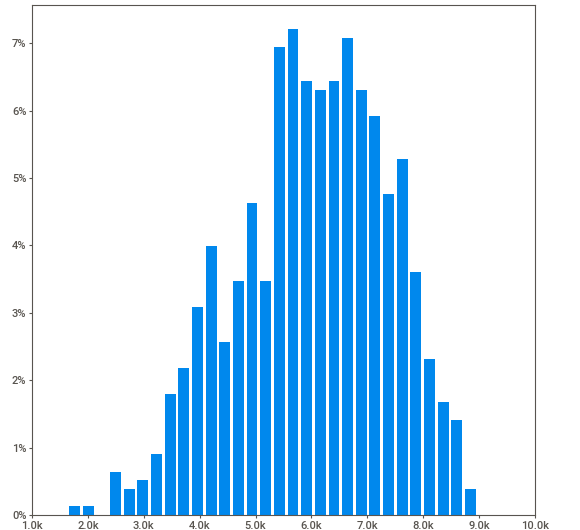
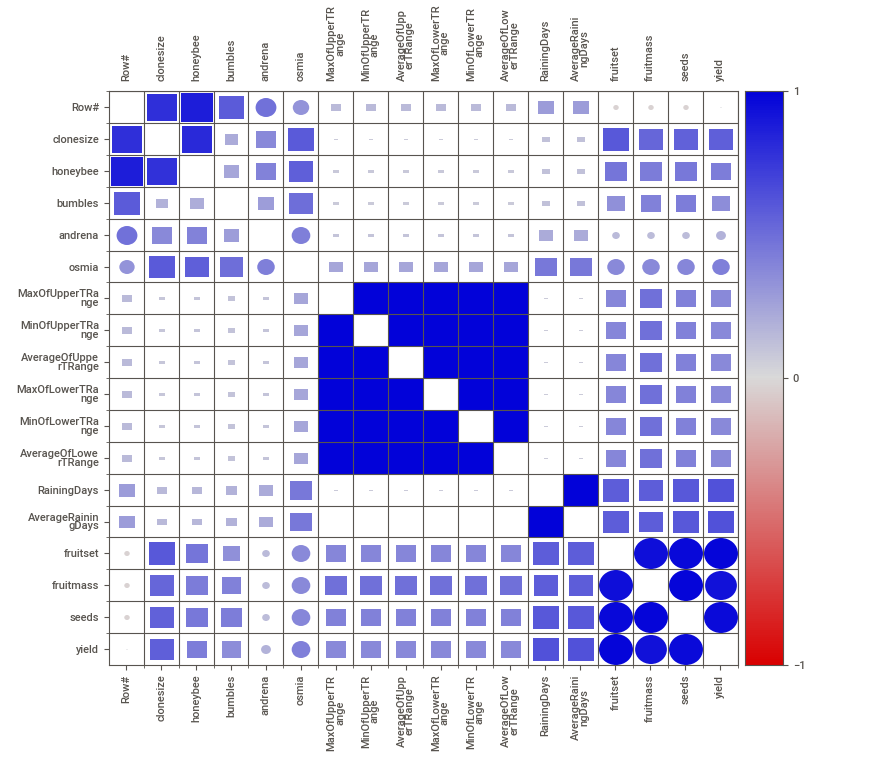
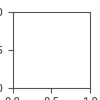

In [10]:
import IPython
from IPython.display import HTML
HTML('analyze.html')

import IPython
#IPython.OutputArea.auto_scroll_threshold = 9999;

#from IPython.display import display, HTML
#display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
#IPython.display.HTML('analyze.html')

from IPython.display import HTML
HTML('analyze.html')


# Preprocessing


columns to drop: 'Row#', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee'

In [11]:
berry_data.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [12]:
bbry_data_process = berry_data.drop(columns=['Row#', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee'])
bbry_data_process

clonesize  bumbles  andrena  osmia  AverageOfUpperTRange  \
0        37.50     0.25     0.25   0.25                 71.90   
1        37.50     0.25     0.25   0.25                 71.90   
2        37.50     0.25     0.25   0.25                 79.00   
3        37.50     0.25     0.25   0.25                 79.00   
4        37.50     0.25     0.25   0.25                 71.90   
..         ...      ...      ...    ...                   ...   
772      10.00     0.12     0.41   0.06                 71.90   
773      40.00     0.12     0.41   0.06                 71.90   
774      20.00     0.12     0.41   0.06                 71.90   
775      20.00     0.12     0.41   0.06                 65.60   
776      20.00     0.12     0.41   0.06                 65.60   

     AverageOfLowerTRange  AverageRainingDays  fruitset  fruitmass  seeds  \
0                   50.80                0.26      0.41       0.41  31.68   
1                   50.80                0.10      0.44       0.43  33.45   
2                   55.90                0.26      0.38       0.40  30.55   
3                   55.90                0.10      0.41       0.41  31.56   
4                   50.80                0.39      0.35       0.38  28.87   
..                    ...                 ...       ...        ...    ...   
772                 50.80                0.06      0.49       0.43  33.45   
773                 50.80                0.06      0.34       0.38  28.46   
774                 50.80                0.39      0.40       0.40  30.75   
775                 45.30                0.06      0.40       0.40  30.58   
776                 45.30                0.39      0.38       0.39  29.74   

      yield  
0   3813.17  
1   4947.61  
2   3866.80  
3   4303.94  
4   3436.49  
..      ...  
772 5333.87  
773 3373.44  
774 4203.03  
775 4166.30  
776 3943.13  

[777 rows x 11 columns]

In [13]:
#For numerical features in Pre-processing, Feature Scaling & outlier removal

In [14]:
part1 = bbry_data_process.drop(columns=['yield'])
part2 = bbry_data_process[['yield']]
part1

clonesize  bumbles  andrena  osmia  AverageOfUpperTRange  \
0        37.50     0.25     0.25   0.25                 71.90   
1        37.50     0.25     0.25   0.25                 71.90   
2        37.50     0.25     0.25   0.25                 79.00   
3        37.50     0.25     0.25   0.25                 79.00   
4        37.50     0.25     0.25   0.25                 71.90   
..         ...      ...      ...    ...                   ...   
772      10.00     0.12     0.41   0.06                 71.90   
773      40.00     0.12     0.41   0.06                 71.90   
774      20.00     0.12     0.41   0.06                 71.90   
775      20.00     0.12     0.41   0.06                 65.60   
776      20.00     0.12     0.41   0.06                 65.60   

     AverageOfLowerTRange  AverageRainingDays  fruitset  fruitmass  seeds  
0                   50.80                0.26      0.41       0.41  31.68  
1                   50.80                0.10      0.44       0.43  33.45  
2                   55.90                0.26      0.38       0.40  30.55  
3                   55.90                0.10      0.41       0.41  31.56  
4                   50.80                0.39      0.35       0.38  28.87  
..                    ...                 ...       ...        ...    ...  
772                 50.80                0.06      0.49       0.43  33.45  
773                 50.80                0.06      0.34       0.38  28.46  
774                 50.80                0.39      0.40       0.40  30.75  
775                 45.30                0.06      0.40       0.40  30.58  
776                 45.30                0.39      0.38       0.39  29.74  

[777 rows x 10 columns]

In [15]:
Q1 = part1.quantile(0.25)
Q3 = part1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#IQR- how far data point is from mean, median etc

clonesize              12.50
bumbles                 0.13
andrena                 0.25
osmia                   0.25
AverageOfUpperTRange    7.20
AverageOfLowerTRange    5.00
AverageRainingDays      0.29
fruitset                0.11
fruitmass               0.06
seeds                   6.12
dtype: float64


In [16]:
bbry_data_iqr = bbry_data_process[~((bbry_data_process < (Q1 - 1.5 * IQR)) | (bbry_data_process > (Q3 + 1.5 * IQR))).any(axis=1)]
bbry_data_iqr.shape

(752, 11)

In [17]:
bbry_data_iqr

clonesize  bumbles  andrena  osmia  AverageOfUpperTRange  \
0        37.50     0.25     0.25   0.25                 71.90   
1        37.50     0.25     0.25   0.25                 71.90   
2        37.50     0.25     0.25   0.25                 79.00   
3        37.50     0.25     0.25   0.25                 79.00   
4        37.50     0.25     0.25   0.25                 71.90   
..         ...      ...      ...    ...                   ...   
754      25.00     0.38     0.63   0.50                 64.70   
755      25.00     0.38     0.63   0.50                 58.20   
756      25.00     0.38     0.63   0.50                 58.20   
757      25.00     0.38     0.63   0.50                 64.70   
758      25.00     0.38     0.63   0.50                 64.70   

     AverageOfLowerTRange  AverageRainingDays  fruitset  fruitmass  seeds  \
0                   50.80                0.26      0.41       0.41  31.68   
1                   50.80                0.10      0.44       0.43  33.45   
2                   55.90                0.26      0.38       0.40  30.55   
3                   55.90                0.10      0.41       0.41  31.56   
4                   50.80                0.39      0.35       0.38  28.87   
..                    ...                 ...       ...        ...    ...   
754                 45.80                0.10      0.56       0.48  39.45   
755                 41.20                0.26      0.49       0.43  34.78   
756                 41.20                0.10      0.50       0.43  35.19   
757                 45.80                0.39      0.51       0.46  37.21   
758                 45.80                0.56      0.50       0.45  35.76   

      yield  
0   3813.17  
1   4947.61  
2   3866.80  
3   4303.94  
4   3436.49  
..      ...  
754 7184.01  
755 6292.96  
756 6374.44  
757 6180.95  
758 5700.24  

[752 rows x 11 columns]

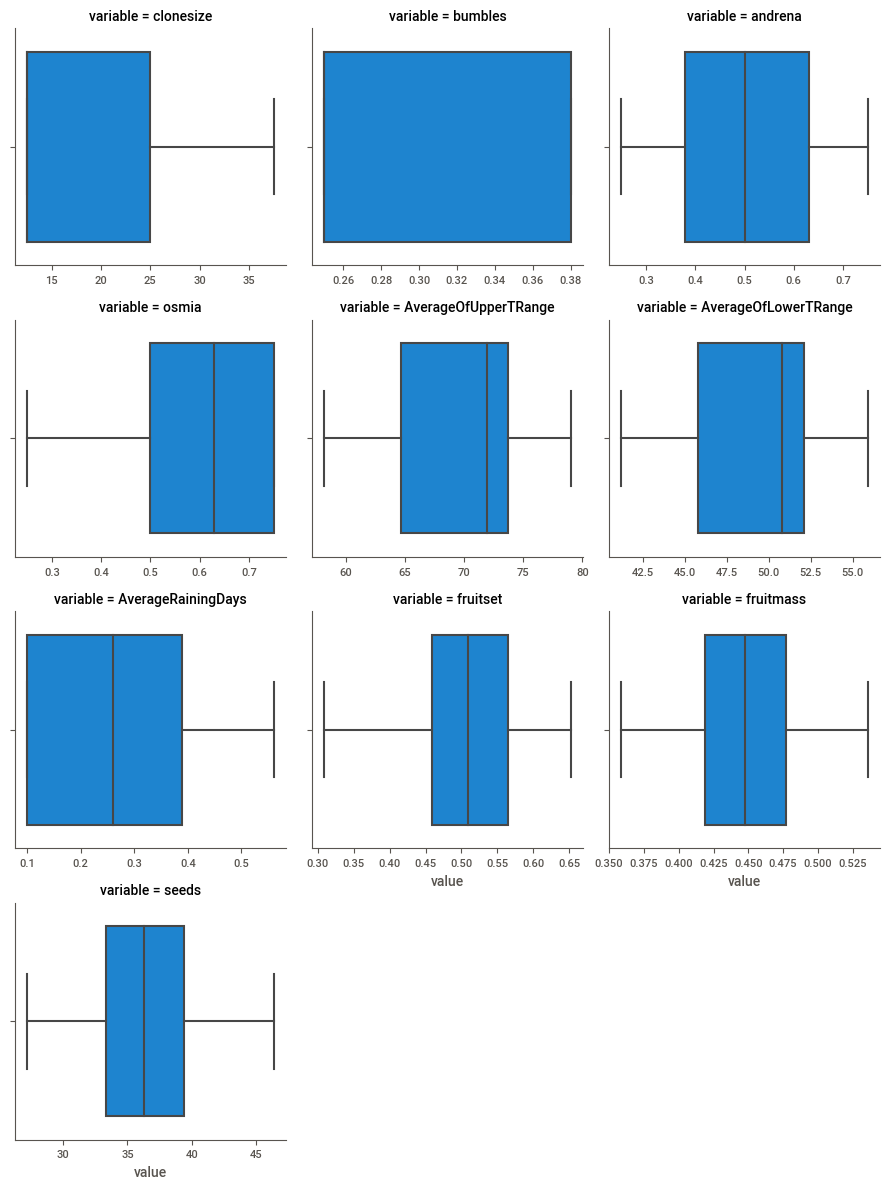

In [18]:
unpivot = pd.melt(bbry_data_iqr, bbry_data_iqr.describe().columns[-1], bbry_data_iqr.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [19]:
z = np.abs(stats.zscore(bbry_data_process))
print(z)
#z-score- how far data point is from central value of each column, original value.. each column a vector

     clonesize  bumbles  andrena  osmia  AverageOfUpperTRange  \
0         2.68     0.49     1.36   1.85                  0.41   
1         2.68     0.49     1.36   1.85                  0.41   
2         2.68     0.49     1.36   1.85                  1.34   
3         2.68     0.49     1.36   1.85                  1.34   
4         2.68     0.49     1.36   1.85                  0.41   
..         ...      ...      ...    ...                   ...   
772       1.25     2.49     0.37   2.98                  0.41   
773       3.04     2.49     0.37   2.98                  0.41   
774       0.18     2.49     0.37   2.98                  0.41   
775       0.18     2.49     0.37   2.98                  0.41   
776       0.18     2.49     0.37   2.98                  0.41   

     AverageOfLowerTRange  AverageRainingDays  fruitset  fruitmass  seeds  \
0                    0.40                0.35      1.15       0.94   1.02   
1                    0.40                1.29      0.73       0.5

In [20]:
bbry_data_zscore = bbry_data_process[(z < 3).all(axis=1)]
bbry_data_zscore.shape

(764, 11)



col1  col2  col3
A     1      P
B     2      Q
c     3      R



value variable  name
A       col1    'col3'
B      col1     'col3'


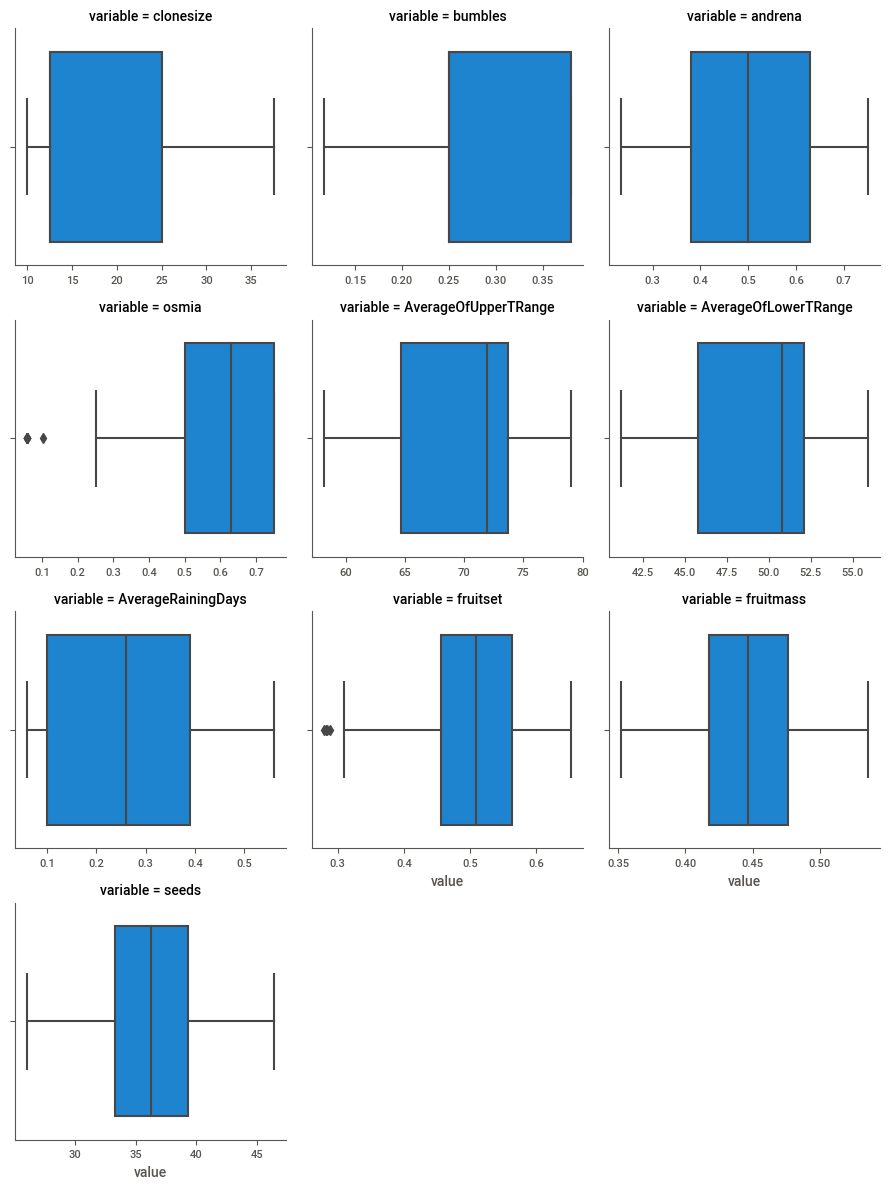

In [21]:
unpivot = pd.melt(bbry_data_zscore, bbry_data_zscore.columns[-1], bbry_data_zscore.columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")


plt.show()



In [22]:
bbry_data_process = bbry_data_zscore
bbry_data_process

clonesize  bumbles  andrena  osmia  AverageOfUpperTRange  \
0        37.50     0.25     0.25   0.25                 71.90   
1        37.50     0.25     0.25   0.25                 71.90   
2        37.50     0.25     0.25   0.25                 79.00   
3        37.50     0.25     0.25   0.25                 79.00   
4        37.50     0.25     0.25   0.25                 71.90   
..         ...      ...      ...    ...                   ...   
770      20.00     0.29     0.23   0.06                 71.90   
772      10.00     0.12     0.41   0.06                 71.90   
774      20.00     0.12     0.41   0.06                 71.90   
775      20.00     0.12     0.41   0.06                 65.60   
776      20.00     0.12     0.41   0.06                 65.60   

     AverageOfLowerTRange  AverageRainingDays  fruitset  fruitmass  seeds  \
0                   50.80                0.26      0.41       0.41  31.68   
1                   50.80                0.10      0.44       0.43  33.45   
2                   55.90                0.26      0.38       0.40  30.55   
3                   55.90                0.10      0.41       0.41  31.56   
4                   50.80                0.39      0.35       0.38  28.87   
..                    ...                 ...       ...        ...    ...   
770                 50.80                0.06      0.50       0.45  36.63   
772                 50.80                0.06      0.49       0.43  33.45   
774                 50.80                0.39      0.40       0.40  30.75   
775                 45.30                0.06      0.40       0.40  30.58   
776                 45.30                0.39      0.38       0.39  29.74   

      yield  
0   3813.17  
1   4947.61  
2   3866.80  
3   4303.94  
4   3436.49  
..      ...  
770 5449.42  
772 5333.87  
774 4203.03  
775 4166.30  
776 3943.13  

[764 rows x 11 columns]

In [23]:
X = bbry_data_process.drop(["yield"], axis=1)
y = bbry_data_process['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [24]:
from sklearn.utils import all_estimators

# Lazy Predict

In [25]:
from lazypredict.Supervised import LazyRegressor

In [26]:
### fitting data in LazyRegressor because here we are solving Regression use case. 
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [27]:
### fitting data in LazyClassifier
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)

100%|██████████| 42/42 [00:02<00:00, 14.02it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
RidgeCV                                      0.99       0.99  123.41   
BayesianRidge                                0.99       0.99  123.47   
LassoLarsCV                                  0.99       0.99  123.52   
LassoLarsIC                                  0.99       0.99  123.55   
TransformedTargetRegressor                   0.99       0.99  123.70   
LinearRegression                             0.99       0.99  123.70   
Lars                                         0.99       0.99  123.70   
RANSACRegressor                              0.99       0.99  123.89   
Ridge                                        0.99       0.99  125.23   
Lasso                                        0.99       0.99  125.51   
HuberRegressor                               0.99       0.99  126.12   
LassoCV                                      0.99       0.99  12

# Feature Selection

As a part of which, we will perform feature selection.

We have created 2 splits on Dataset, and each will be analysed on the importance of either Mutual Information gain or Correlation Regression values

In [28]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

I would have to perform many folds of tuning on the decided dataset, hence I would have to choose either one option of the below

info-gain vs correlation
The KSelection score plot describes a good behavior of the Information Gain Values. Hence, all the dataset will be based on the same

In [30]:
X = bbry_data_process.drop(["yield"], axis=1)
y = bbry_data_process['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#Correlation is standard for Regression problems, but since there are many categorical values also Info Gain cud be an option too

X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

Feature 0: 175.463722
Feature 1: 35.414625
Feature 2: 8.092982
Feature 3: 95.866044
Feature 4: 23.685723
Feature 5: 23.512387
Feature 6: 265.725911
Feature 7: 18027.130769
Feature 8: 3685.065541
Feature 9: 8199.278441


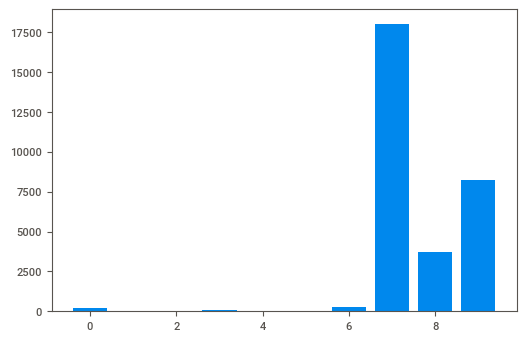

Feature 0: 0.171179
Feature 1: 0.076644
Feature 2: 0.039212
Feature 3: 0.111131
Feature 4: 0.127531
Feature 5: 0.127380
Feature 6: 0.223513
Feature 7: 2.052741
Feature 8: 1.629359
Feature 9: 1.691315


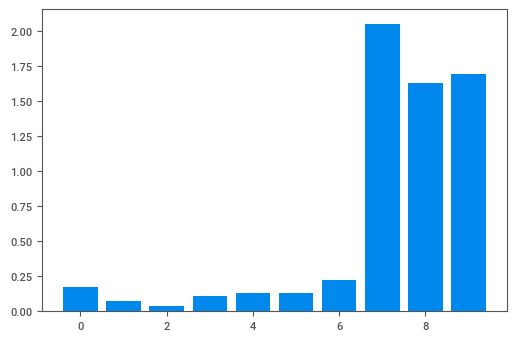

In [31]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.scores_)):
        print('Feature %d: %f' % (i, fs_func.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs_func.scores_))], fs_func.scores_)
    plt.show()
    
fs_score_plot(fs_corr)
fs_score_plot(fs_info)

# Modelling 

<p style="font-size: 17px;"> <b> We will now train the model on top 9 features, using both the splits of dataset, <br>and check the metrics of the same on <span style="color: purple;"> 4 Models </span> </b></p>

* Linear Regression
* Random Forest
* Decision Tree
* XGBoost

In [32]:
X = bbry_data_process.drop(["yield"], axis=1)
y = bbry_data_process['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs, X_test_fs, fs_info = select_features_infogain_based(X_train, y_train, X_test, x=9)

### LinearRegression

In [33]:
lreg = LinearRegression()

lreg.fit(X_train_fs, y_train)

yhat = lreg.predict(X_test_fs)

In [34]:
mae_linear = mean_absolute_error(y_test, yhat)
mse_linear = mean_squared_error(y_test, yhat)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 103.080
MSE: 19166.573
RMSE: 138.443
R-Square: 0.988


### RandomForest Regression

In [35]:
rf = RandomForestRegressor()

rf.fit(X_train_fs, y_train)
    
yhat = rf.predict(X_test_fs)

In [36]:
mae_rf = mean_absolute_error(y_test, yhat)
mse_rf = mean_squared_error(y_test, yhat)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 116.856
MSE: 23526.755
RMSE: 153.384
R-Square: 0.985


### Decision Tree Regression

In [37]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs, y_train)

yhat = dtree.predict(X_test_fs)

In [38]:
mae_dt = mean_absolute_error(y_test, yhat)
mse_dt = mean_squared_error(y_test, yhat)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 179.454
MSE: 58298.746
RMSE: 241.451
R-Square: 0.963


### XGBRegression 

In [39]:
xgb = XGBRegressor()

xgb.fit(X_train_fs, y_train)

yhat = xgb.predict(X_test_fs)

In [40]:
mae_xgb = mean_absolute_error(y_test, yhat)
mse_xgb = mean_squared_error(y_test, yhat)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 114.365
MSE: 21906.750
RMSE: 148.009
R-Square: 0.986


# Model Evaluation


<p style="font-size: 17px;"> We can also check the R<sup>2</sup> score. Here, we will be aiming to reduce the <br><b>RMSE</b> and <b> MAE </b> values</p>

The comparative BarPlot shows the values of each. We have **Linear Regression** (150.309) and **XGBoost** (145.976) at the lowest Error Rate

In [41]:
# CV evaluation for all the models
# from sklearn.metrics import r2_score

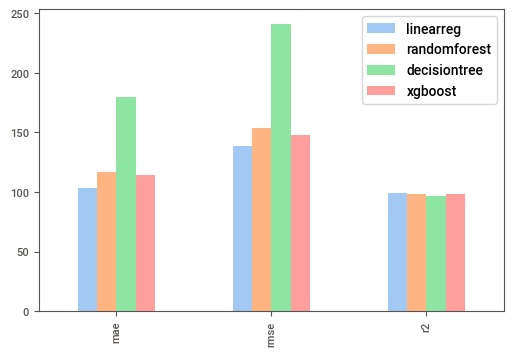

In [42]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

# Hyperparameter Tuning

crossvalidation, RepeatedKFold and GridSearchCV are the popular methods for Parameter Tuning

We have only tuned the model for K values, plus an addition model parameter. With greater processor, the tuning can afford to produce folds 3 times over 4 parameter values 
>Another alternative is:
> <span style="color: purple"><b> TuneSearchCV </b></span>

In [43]:
cv = RepeatedKFold(n_splits= 50, n_repeats = 3, random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)


# define pipeline for each algorithm
# define GSCV for each
# loop through it

# pipe = Pipeline ([(preprocessing: scaling), (FS: selectKBEST), (modelling: model)])

pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

# pipe_lr.get_params().keys()

In [44]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        'model__criterion': ['mse', 'mae'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
                    'model__criterion': ['mse', 'mae'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]


# for gridsearchcv we need estimator (model), parameter (model), scoring

#For Kaggle competitions we do like below
# def custom_metric(values):
#     #calculate metric
#     return metric_value

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]


#we can use batch tuning here as it is a small dataset of arnd 700 rows, with huge datasets ram crashes
# Creating a dict for our reference
grid_dict = {0: 'Linear Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [45]:
# store the error values in a dataframe and plot as evaluation visualization also see boosted DTree and R2 square values

In [46]:
# Start form initial scaled model: X_train17 and X_test17, y_train17 and y_test17
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs, y_train)
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    
    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))
    
    return (grid_dict[best_regr], best_gs, least_mae)

# Prediction and Evaluation

**Running the GridSearchCV and saving the best model.**

In [47]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Linear Regression
Best Config: {'sel__k': 4}
Best MAE: -116.867
Test set mean absolute error for best params: 127.375 
Test set root mean squared error for best params: 11.286 

Estimator: Random Forest
Best Config: {'model__criterion': 'mse', 'sel__k': 4}
Best MAE: -130.967
Test set mean absolute error for best params: 130.067 
Test set root mean squared error for best params: 11.405 

Estimator: XGBoost
Best Config: {'model__subsample': 0.9, 'sel__k': 4}
Best MAE: -137.503
Test set mean absolute error for best params: 135.459 
Test set root mean squared error for best params: 11.639 

Estimator: Decision Tree
Best Config: {'model__criterion': 'mse', 'sel__k': 4}
Best MAE: -175.420
Test set mean absolute error for best params: 177.971 
Test set root mean squared error for best params: 13.341 

Classifier with least test set MAE: Linear Regression
Best Model: Linear Regression
Error Rate: 127.37497315779919
GridSearchCV(cv=RepeatedKFold(n_r

<p style="font-size: 17px;"> Although Linear Regression is the best of the listed models, <b>RandomForest</b> would potentially produce closer precise results, due to good learning rate, hence I would retune it in addition to the best params extracted in the first search </p>

In [48]:


grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=8)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))
        

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 10, 'model__min_samples_split': 2}
Best MAE: -120.603
Test set mean absolute error for best params: 116.359 
Test set root mean squared error for best params: 10.787 
